## Plotting Dispersion

### From Existing Phonon Frequencies

Phonon frequencies and eigenvectors can be read in
from a pre-existing .phonon file

In [1]:
from euphonic import QpointPhononModes

phonons = QpointPhononModes.from_castep('castep_files/graphite.phonon')

We convert the modes to a `Spectrum1DCollection` object that we can plot using `plot_1d`.

<class 'euphonic.spectra.Spectrum1DCollection'>


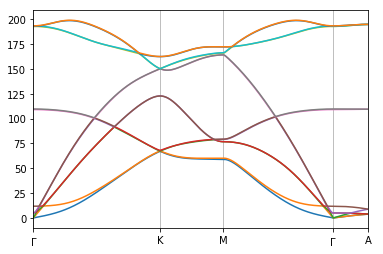

In [2]:
from euphonic.plot import plot_1d

bands = phonons.get_dispersion()
print(type(bands))
fig = plot_1d(bands)

The frequency units can be changed by changing
`QpointPhononModes.frequencies_unit`, which will
be reflected in the plot

In [3]:
phonons.frequencies_unit = '1/cm'

We can also change some of the plot options, such
as adding axis titles, and changing the lower limit
on the y-axis.

`pint.Quantity` objects are used to store data with
units in Euphonic, and support pretty printing, so this can
be used to automatically generate axis labels with the
correct units, as seen in the `y_label` argument

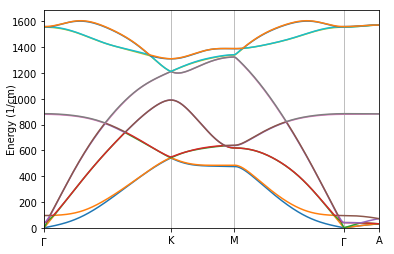

In [4]:
fig = plot_1d(phonons.get_dispersion(), y_min=0,
              y_label=f'Energy ({phonons.frequencies.units:~P})')

The appearance of the plot can further be improved by using the eigenvector data to re-order the lines.

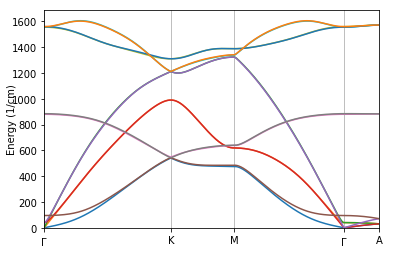

In [5]:
phonons.reorder_frequencies()
fig = plot_1d(phonons.get_dispersion(), y_min=0,
              y_label=f'Energy ({phonons.frequencies.units:~P})')

### From Force Constants

We can also calculate and then plot frequencies from
force constants. First read in the force constants:

In [6]:
from euphonic import ForceConstants

fc = ForceConstants.from_castep('castep_files/quartz.castep_bin')

We can use `seekpath` to generate a nice 'recommended' q-point path

In [7]:
import seekpath
import numpy as np

_, unique_atoms = np.unique(fc.crystal.atom_type, return_inverse=True)
structure = (fc.crystal.cell_vectors.magnitude,
             fc.crystal.atom_r, unique_atoms)
qpts = seekpath.get_explicit_k_path(structure)["explicit_kpoints_rel"]

We can then use `calculate_qpoint_phonon_modes` to interpolate the
force constants to create a `QpointPhononModes` object containing
all the frequencies and eigenvectors at those q-points

`asr` describes which acoustic sum rule to use, either 'realspace'
or 'reciprocal'

`insert_gamma` will allow extra gamma points to be inserted into qpts
so LO-TO splitting can be seen

There are many more options, try
`help(ForceConstants.calculate_qpoint_phonon_modes)` for details

In [8]:
phonons = fc.calculate_qpoint_phonon_modes(qpts, asr='reciprocal', insert_gamma=True)

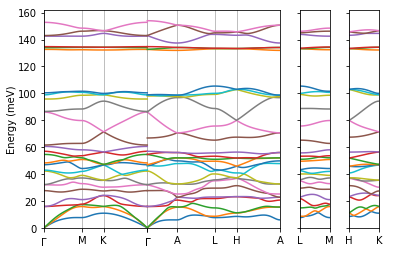

In [9]:
fig = plot_1d(phonons.get_dispersion().split(), y_min=0,
                      y_label=f'Energy ({phonons.frequencies.units:~P})')

Note that `split()` was used to create a series of axes for the discontinuous plotting regions.
The split points are determined using the `btol` argument, set it higher to increase the threshold for plotting on different subplots

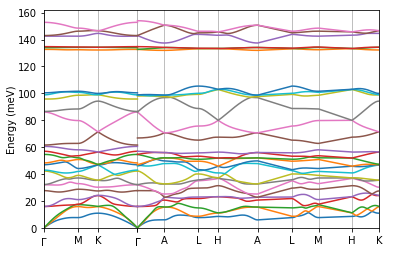

In [10]:
fig = plot_1d(phonons.get_dispersion().split(btol=1000), y_min=0,
                      y_label=f'Energy ({phonons.frequencies.units:~P})')

Note that because `btol` was far too large, the segments from A-L and M-H are straight lines that do not accurately reflect this region of reciprocal space.